### Firstly we load the raw_data and extract the .wav file and the labels(The 4 bands)

#### Using data_import function to load the wav files and the labels

In [2]:
import pandas as pd
import os
import librosa
from pyaudio_features import *

wavs, labels = data_import('..\\raw_data')

In [9]:
print('---Path to Wav files for each band---')
print()
wavs[::]

---Path to Wav files for each band---



['..\\raw_data\\Dream_Theater\\A dramatic turn of events\\Breaking All Illusions_riff.wav',
 '..\\raw_data\\Dream_Theater\\A dramatic turn of events\\Bridges in the Sky_riff.wav',
 '..\\raw_data\\Dream_Theater\\A dramatic turn of events\\Build Me Up And Break Me Down_riff.wav',
 '..\\raw_data\\Dream_Theater\\A dramatic turn of events\\Lost Not Forgotten_riff.wav',
 '..\\raw_data\\Dream_Theater\\A dramatic turn of events\\On The Backs Of Angels_riff.wav',
 '..\\raw_data\\Dream_Theater\\A dramatic turn of events\\Outcry_riff.wav',
 '..\\raw_data\\Dream_Theater\\A View from the Top of the World\\A View from the Top of the World_riff.wav',
 '..\\raw_data\\Dream_Theater\\A View from the Top of the World\\Answering The Call_riff.wav',
 '..\\raw_data\\Dream_Theater\\A View from the Top of the World\\Awaken the Master_riff.wav',
 '..\\raw_data\\Dream_Theater\\A View from the Top of the World\\Dream Theater - Invisible Monster_riff.wav',
 '..\\raw_data\\Dream_Theater\\A View from the Top of the

### Visualizing the information of the path files

In [13]:
print('Path format = ', wavs[5],'\n')

file_path_example = wavs[5]
path_components = file_path_example.split(os.sep)

# Extract the relevant information
band = path_components[-3]
album = path_components[-2]
song = path_components[-1].replace('_riff.wav','')

print("Band name:", band, '\n')
print("Album:", album, '\n')
print("Song:", song, '\n')

Path format =  ..\raw_data\Dream_Theater\A dramatic turn of events\Outcry_riff.wav 

Band name: Dream_Theater 

Album: A dramatic turn of events 

Song: Outcry 



In [20]:
labels

['Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Dream_Theater',
 'Gojira',
 'Gojira',
 'Gojira',
 'Gojira',
 'Gojira',
 'Gojira',
 'Gojira',
 'Gojira',
 'Gojira',
 

### Each class is balanced, containing 50 riffs

In [25]:
print(f"Total Data is {len(wavs)} riffs \n")
print(f"Total Dream_Theater riffs = {labels.count('Dream_Theater')} \n")
print(f"Total Gojira riffs = {labels.count('Gojira')} \n")     
print(f"Total Opeth riffs = {labels.count('Opeth')} \n")
print(f"Total Symphony_X riffs = {labels.count('Symphony X')} \n")

Total Data is 200 riffs 

Total Dream_Theater riffs = 50 

Total Gojira riffs = 50 

Total Opeth riffs = 50 

Total Symphony_X riffs = 50 



### Check the length of some wav files

In [26]:
for wav in wavs[:10]:
    y, _ = librosa.load(wav)
    duration = librosa.get_duration(y=y, sr = 22050)
    print(f"Audio duration = {duration:.3f} seconds")

Audio duration = 12.658 seconds
Audio duration = 12.400 seconds
Audio duration = 18.635 seconds
Audio duration = 14.851 seconds
Audio duration = 14.021 seconds
Audio duration = 11.601 seconds
Audio duration = 13.204 seconds
Audio duration = 11.141 seconds
Audio duration = 13.396 seconds
Audio duration = 13.870 seconds


### The time of each riff is different for every song. Next step is to set each wav to 10 seconds each so they all are equal

#### Using trim_wav function to get the array of the audio for 10 seconds

In [27]:
y = trim_wav(wavs)

In [38]:
for aud in y[:1000]:
    duration = librosa.get_duration(y=aud, sr = 22050)
    print(f"Audio duration = {duration:.3f} seconds")

Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio duration = 10.000 seconds
Audio du

### Check the wavs in plots

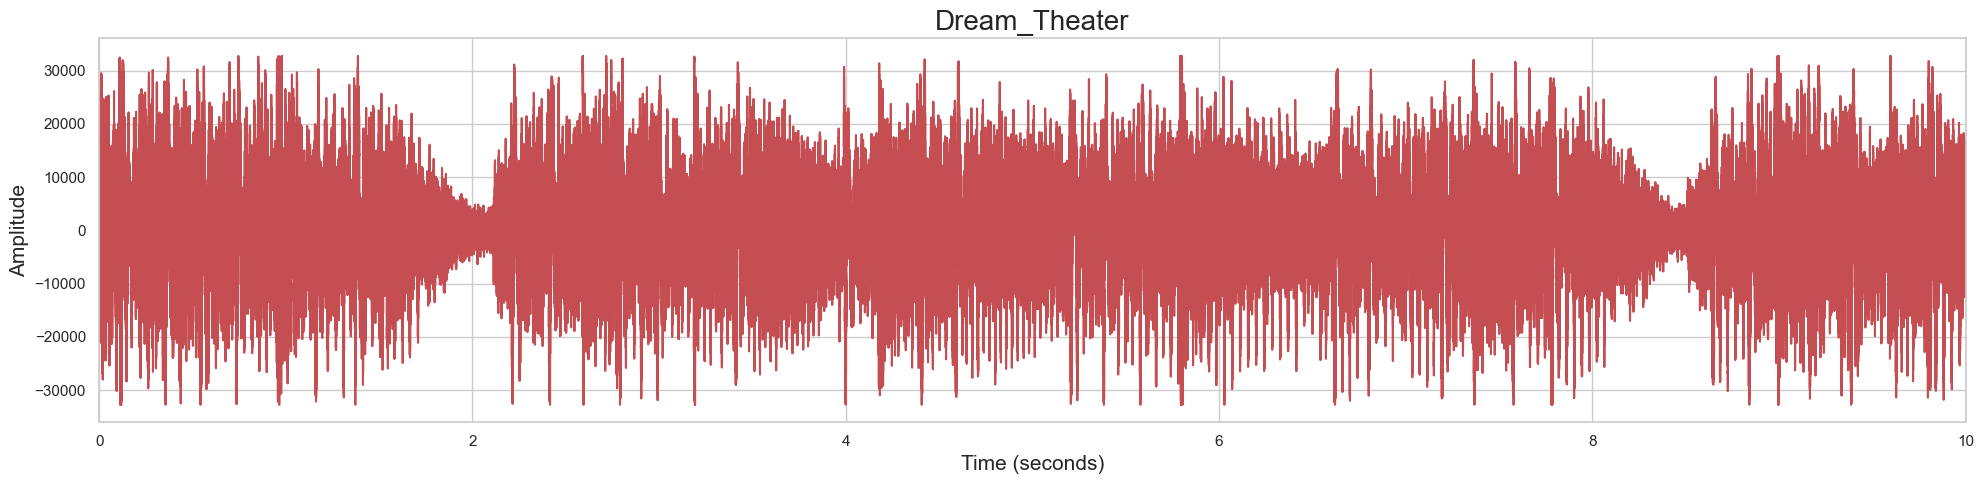

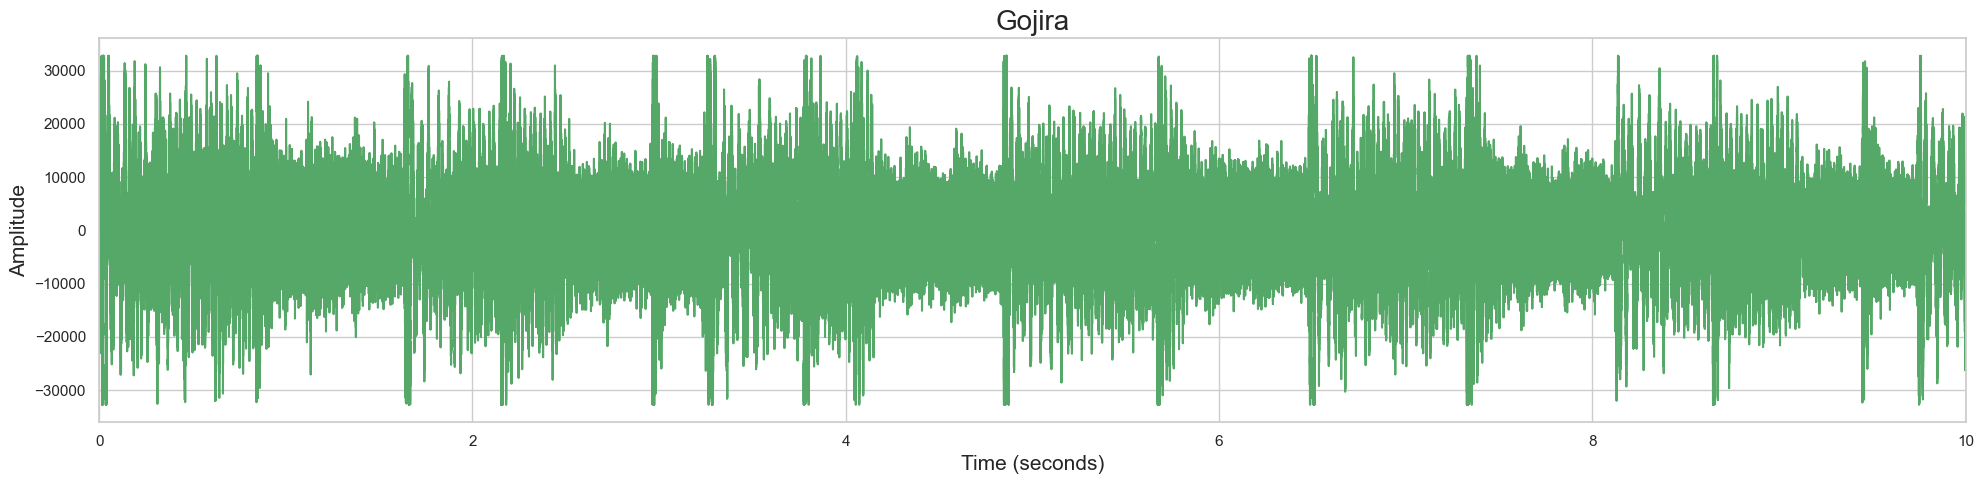

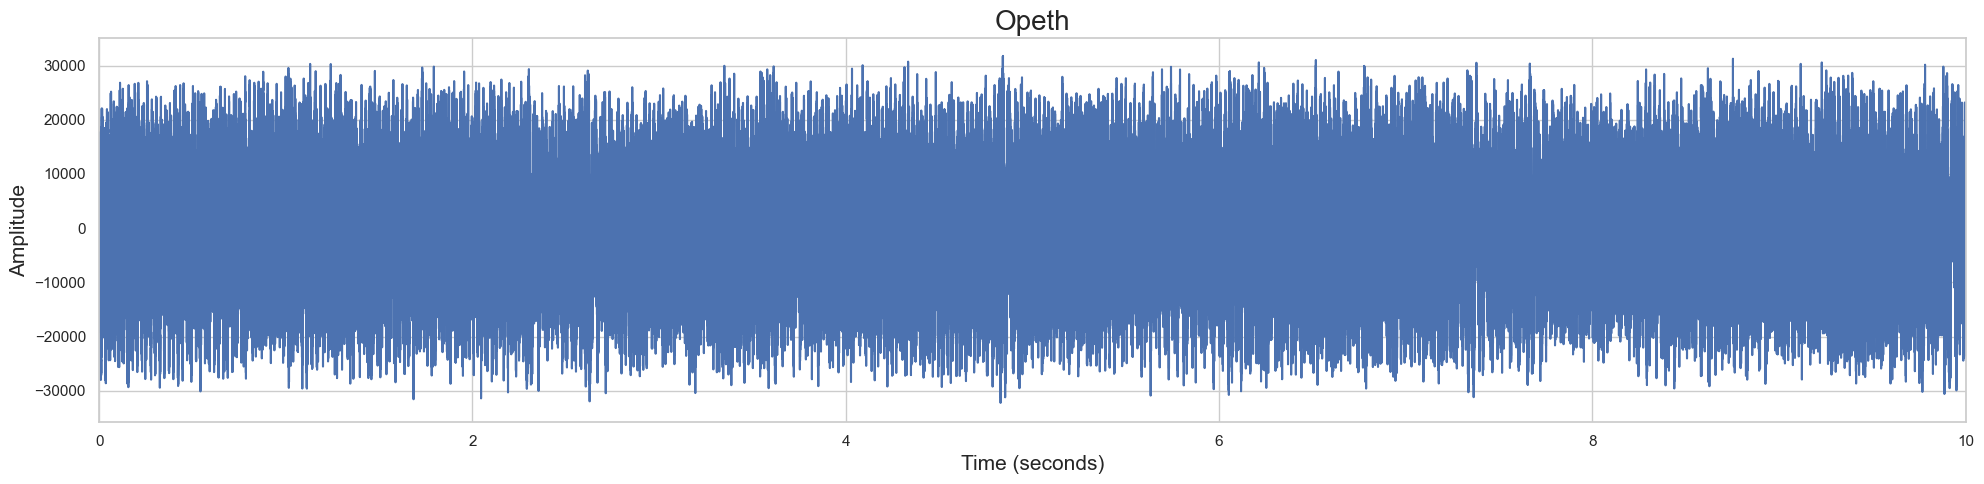

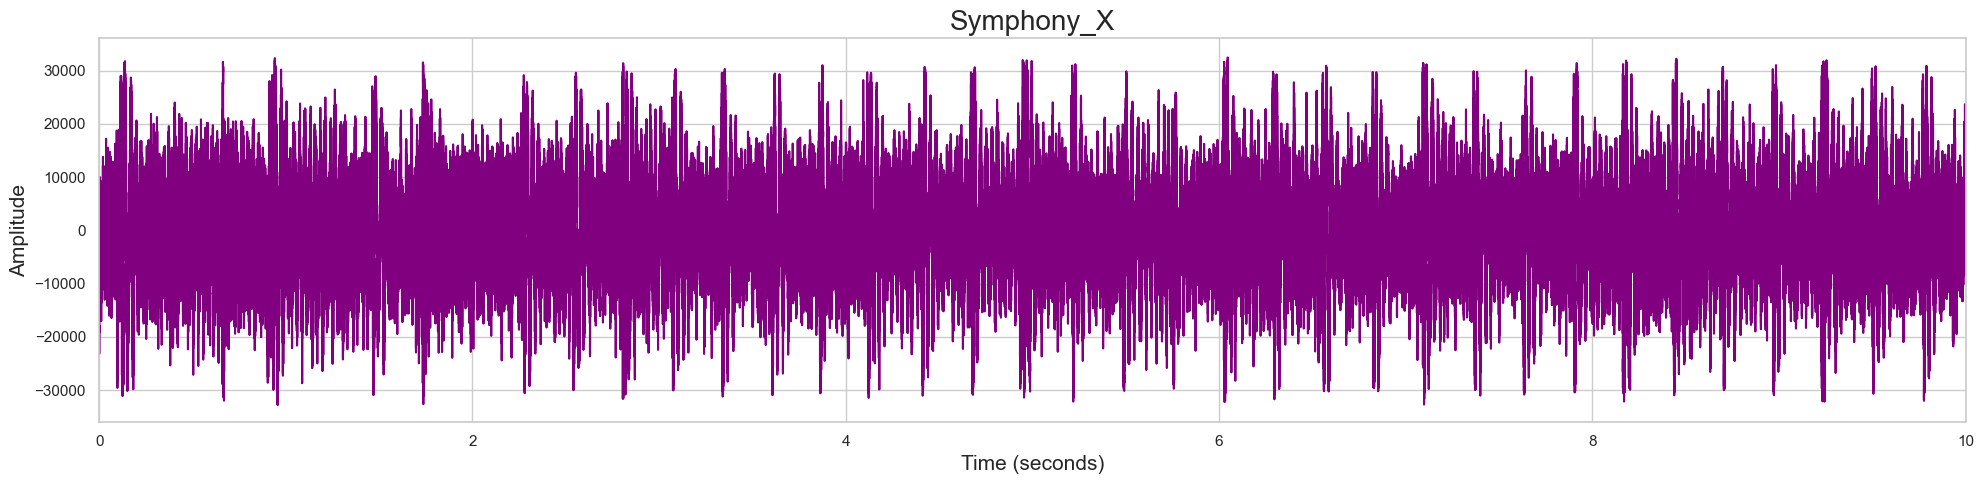

In [3]:
band_0 = wavs[0]
band_1 = wavs[52]
band_2 = wavs[101]
band_3 = wavs[151]

from plots import plot_wav

plot_wav(band_0,'Dream_Theater',color='r')
plot_wav(band_1,'Gojira',color='g')
plot_wav(band_2,'Opeth',color='b')
plot_wav(band_3,'Symphony_X',color='purple')

### Each riff is now up to 10 second except very few that are 1-2 seconds lower by default

### From the y arrays we extract the features using pyAudioAnalysis

#### Using pyaudio_featurize function

#### This takes a long time to run 

In [28]:
from pyaudio_features import *
import warnings

warnings.simplefilter('ignore')

dataframe = pyaudio_featurize(y)

### The extracted features are 68 for each (150) mili-second as calculated with pyAudioAnalysis package.
### From those 64 features we extract the mean and the standard deviation.
### Each instance now consists of a feature vector with 136 features.

In [29]:
print("Dataframe")
dataframe.head()

Dataframe


,zcr_mean,energy_mean,energy_entropy_mean,spectral_centroid_mean,spectral_spread_mean,spectral_entropy_mean,spectral_flux_mean,spectral_rolloff_mean,mfcc_1_mean,mfcc_2_mean,...,delta chroma_4_std,delta chroma_5_std,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std
0,0.105710,0.055723,3.053597,0.217957,0.239820,0.695104,0.001577,0.109814,-20.855312,1.911188,...,0.021739,0.018734,0.039033,0.022345,0.005291,0.012969,0.026643,0.022178,0.033123,0.014227
1,0.099929,0.051860,2.945046,0.219332,0.243923,0.628016,0.001475,0.092321,-20.900489,2.061422,...,0.035314,0.023725,0.031425,0.024282,0.010639,0.014806,0.019003,0.019307,0.021064,0.007799
2,0.122507,0.040403,3.044921,0.234820,0.237650,0.940604,0.001130,0.182423,-20.776285,1.757447,...,0.031992,0.016582,0.032652,0.030027,0.005646,0.014284,0.018869,0.009644,0.016256,0.010675
3,0.097158,0.055385,2.993176,0.219220,0.243528,0.575079,0.002444,0.090808,-21.935915,1.985577,...,0.029330,0.011435,0.022172,0.058616,0.012178,0.019639,0.046416,0.027569,0.022451,0.018006
4,0.101324,0.056167,2.986543,0.219075,0.236040,0.705186,0.001545,0.113600,-20.841324,1.879387,...,0.029139,0.015227,0.029054,0.018910,0.014328,0.032411,0.017874,0.016125,0.023282,0.011299


In [31]:
pd.set_option('display.max_columns', None)
print(f'Total features of the dataset = {len(dataframe.columns)} \n')
print(dataframe.columns)

Total features of the dataset = 136 

Index(['zcr_mean', 'energy_mean', 'energy_entropy_mean',
       'spectral_centroid_mean', 'spectral_spread_mean',
       'spectral_entropy_mean', 'spectral_flux_mean', 'spectral_rolloff_mean',
       'mfcc_1_mean', 'mfcc_2_mean',
       ...
       'delta chroma_4_std', 'delta chroma_5_std', 'delta chroma_6_std',
       'delta chroma_7_std', 'delta chroma_8_std', 'delta chroma_9_std',
       'delta chroma_10_std', 'delta chroma_11_std', 'delta chroma_12_std',
       'delta chroma_std_std'],
      dtype='object', length=136)


### Next step is to put the labels (bands) in the dataframe as well

#### Using merge labels function
 
#### Each of the four band names is assigned to an integer 0-3 based on their order

#### Dream_Theater = 0, Opeth = 1, Gojira = 2, Symphony_X = 3

In [32]:
merge_labels(dataframe,labels)

In [33]:
dataframe['Band']

0      0
1      0
2      0
3      0
4      0
      ..
195    3
196    3
197    3
198    3
199    3
Name: Band, Length: 200, dtype: int64

### Save the Dataframe in clean_data path

In [34]:
dataframe.to_csv('../clean_data/initial_dataset',index=False)